# Games_Features Analysis and Prediction

In this project, we are going to analysis on games features dataset that contain the columns below and try to use machine learning algorithm to predict the initial price of game based on the features:


1. ResponseName: name of game
2. ReleaseDate: game released date
3. Metacritic
3. RecommendationCount: number of recommendations
4. IsFree: games that are free
5. GenreIsNonGame: non game feature
6. GenreIsIndie: genre is Indie game
7. GenreIsAction: genre is action game
8. GenreIsAdventure: genre is adventure game
9. GenreIsCasual: genre is casual game	
10. GenreIsStrategy: genre is strategy game
11. GenreIsRPG: genre is rpg	
12. GenreIsSimulation: genre is simulation game
13. GenreIsEarlyAccess: genre is early access
14. GenreIsFreeToPlay: genre is free to play
15. GenreIsSports: genre is sports game	
16. GenreIsRacing: genre is racing game
17. GenreIsMassivelyMultiplayer:genre is massively multiplayer game
18. PriceInitial: price of game


### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# get data
data = pd.read_csv('games-features.csv')

In [4]:
data.head()

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
0,Counter-Strike,Nov 1 2000,88,68991,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
2,Day of Defeat,May 1 2003,79,2319,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99


In [5]:
data.shape

(12624, 19)

In [6]:
# Check missing values

data.isna().sum()

ResponseName                    0
ReleaseDate                    86
Metacritic                      0
RecommendationCount             0
IsFree                          0
GenreIsNonGame                  0
GenreIsIndie                    0
GenreIsAction                   0
GenreIsAdventure                0
GenreIsCasual                   0
GenreIsStrategy                 0
GenreIsRPG                      0
GenreIsSimulation               0
GenreIsEarlyAccess              0
GenreIsFreeToPlay               0
GenreIsSports                   0
GenreIsRacing                   0
GenreIsMassivelyMultiplayer     0
PriceInitial                    0
dtype: int64

We have 86 missing data in the release date column

In [23]:
# Drop missing date

data = data.dropna()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12538 entries, 0 to 12623
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ResponseName                 12538 non-null  object 
 1   ReleaseDate                  12538 non-null  object 
 2   Metacritic                   12538 non-null  int64  
 3   RecommendationCount          12538 non-null  int64  
 4   IsFree                       12538 non-null  bool   
 5   GenreIsNonGame               12538 non-null  bool   
 6   GenreIsIndie                 12538 non-null  bool   
 7   GenreIsAction                12538 non-null  bool   
 8   GenreIsAdventure             12538 non-null  bool   
 9   GenreIsCasual                12538 non-null  bool   
 10  GenreIsStrategy              12538 non-null  bool   
 11  GenreIsRPG                   12538 non-null  bool   
 12  GenreIsSimulation            12538 non-null  bool   
 13  GenreIsEarlyAcce

In [25]:
data.columns

Index(['ResponseName', 'ReleaseDate', 'Metacritic', 'RecommendationCount',
       'IsFree', 'GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction',
       'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy', 'GenreIsRPG',
       'GenreIsSimulation', 'GenreIsEarlyAccess', 'GenreIsFreeToPlay',
       'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer',
       'PriceInitial'],
      dtype='object')

In [54]:
# number of games released very year

number_games = data['ResponseName'].groupby(data['ReleaseDate']).count().sort_values(ascending=False)[:20]

In [55]:
number_games

ReleaseDate
Aug 22 2016      241
Aug 26 2016      152
Sep 9 2016        77
Sep 7 2016        68
Apr 5 2016        64
2016              59
Aug 5 2016        49
October 2016      46
2017              43
Jul 26 2016       42
Jun 24 2016       39
Jun 17 2016       39
Sep 2 2016        39
Aug 25 2016       38
Oct 14 2016       36
Jul 17 2009       36
Sep 30 2016       35
Aug 24 2016       35
November 2016     34
Oct 28 2016       34
Name: ResponseName, dtype: int64

Text(0, 0.5, 'Number o Game')

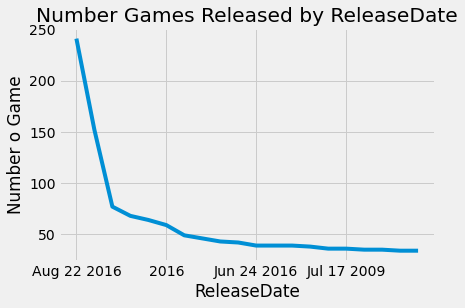

In [73]:
plt.style.use('fivethirtyeight')
number_games.plot()
plt.title('Dates with Most Games Released')
plt.ylabel('Number o Games')

In [92]:
# Top Games with high recommendation count


top_10_games = data[['ResponseName','ReleaseDate', 'RecommendationCount']].sort_values(by=['RecommendationCount'], ascending=False)[:10]
top_10_games

,ResponseName,ReleaseDate,RecommendationCount
27,Counter-Strike: Global Offensive,Aug 21 2012,1427633
23,Dota 2,Jul 9 2013,590480
20,Team Fortress 2,Oct 10 2007,383949
150,Garrys Mod,Nov 29 2006,237684
4028,Unturned,Jul 7 2014,222301
1904,PAYDAY 2,Aug 13 2013,219763
1365,The Elder Scrolls V: Skyrim,Nov 10 2011,182587
1950,DayZ,Dec 16 2013,153350
2576,Rust,Dec 11 2013,145688
22,Left 4 Dead 2,Nov 16 2009,140726


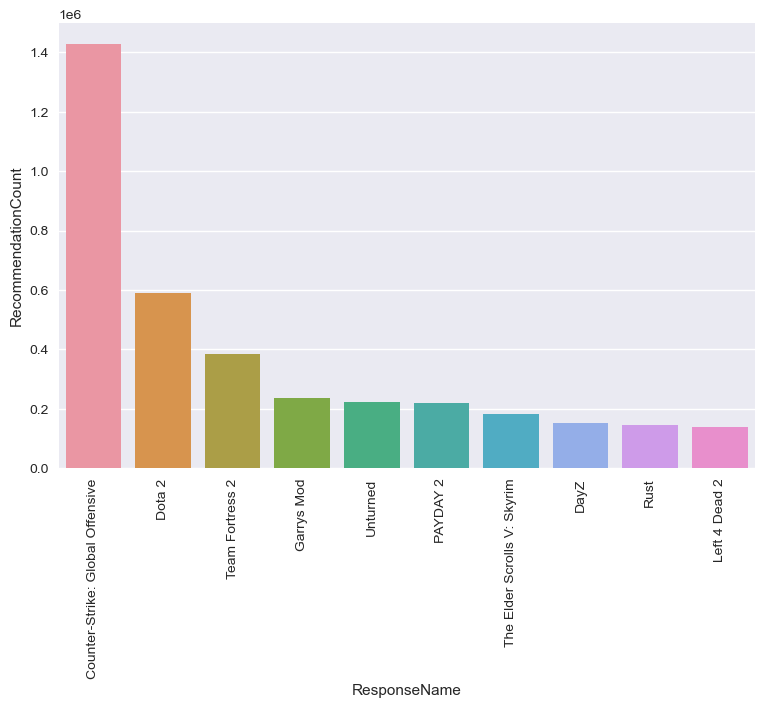

In [124]:
plt.style.use('seaborn')
sns.barplot(x=top_10_games['ResponseName'],y=top_10_games['RecommendationCount'],data=top_10_games)
plt.xticks(rotation=90)
plt.show()

In [108]:
# games with high price

expensive_games =data[['ResponseName','ReleaseDate','PriceInitial']].sort_values(by=['PriceInitial'], ascending=False)[:10]
expensive_games=expensive_games[::-1]

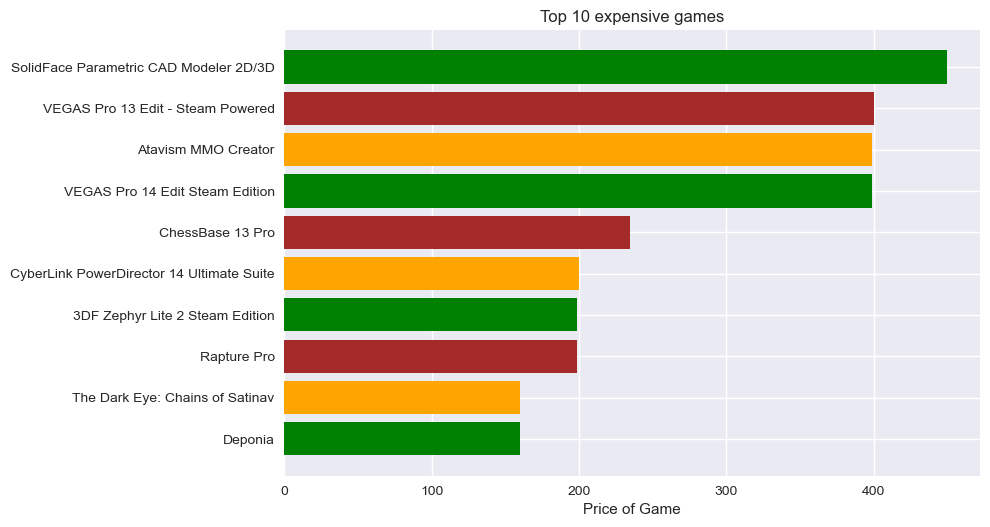

In [126]:
plt.style.use('seaborn')
plt.barh(expensive_games['ResponseName'],expensive_games['PriceInitial'], color=['green','orange','brown'])
plt.xlabel('Price of Game')
plt.title('Top 10 expensive games')
plt.show()

In [141]:
data['IsFree'].value_counts()

False    11579
True       959
Name: IsFree, dtype: int64

In [146]:
# number of free game

free_games = data[['ReleaseDate','ResponseName','IsFree']][data['IsFree']==True][:20]
free_games

,ReleaseDate,ResponseName,IsFree
12,Jun 1 2004,Half-Life: Source,True
15,Oct 27 2005,Half-Life 2: Lost Coast,True
16,May 1 2006,Half-Life Deathmatch: Source,True
20,Oct 10 2007,Team Fortress 2,True
23,Jul 9 2013,Dota 2,True
25,Jul 19 2010,Alien Swarm,True
46,Jul 10 2012,Source Filmmaker,True
65,Jul 11 2006,The Ship: Murder Party,True
69,Dec 19 2006,Gumboy - Crazy Adventures(tm),True
70,Dec 19 2006,Gumboy - Crazy Adventures(tm),True


In [144]:
data.columns

Index(['ResponseName', 'ReleaseDate', 'Metacritic', 'RecommendationCount',
       'IsFree', 'GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction',
       'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy', 'GenreIsRPG',
       'GenreIsSimulation', 'GenreIsEarlyAccess', 'GenreIsFreeToPlay',
       'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer',
       'PriceInitial'],
      dtype='object')

In [147]:
# sports games
data[['ResponseName','GenreIsSports']][data['GenreIsSports']==True]

,ResponseName,GenreIsSports
240,Cabelas(r) Big Game Hunter(tm) Trophy Bucks,True
270,GTR 2 FIA GT Racing Game,True
316,3D Ultra(tm) Minigolf Adventures,True
328,Beijing 2008(tm) - The Official Video Game of ...,True
399,Hunting Unlimited 2010,True
...,...,...
12461,Head It!: VR Soccer Heading Game,True
12474,Dream UniVRse,True
12517,Pixel Soccer,True
12523,Project CARS - Pagani Edition,True


In [158]:
# check relationship between RecommendationCount and PriceInitial

data[['ResponseName','RecommendationCount','PriceInitial']].sort_values(by='RecommendationCount',ascending=False)[:20]

,ResponseName,RecommendationCount,PriceInitial
27,Counter-Strike: Global Offensive,1427633,14.99
23,Dota 2,590480,0.00
20,Team Fortress 2,383949,0.00
150,Garrys Mod,237684,9.99
4028,Unturned,222301,0.00
1904,PAYDAY 2,219763,19.99
1365,The Elder Scrolls V: Skyrim,182587,19.99
1950,DayZ,153350,34.99
2576,Rust,145688,19.99
22,Left 4 Dead 2,140726,19.99


The games with higher recommendation count are not all that costly.

### Prepare the data for modelling

In [174]:
df = data.copy()

In [178]:
# Lets slice off the unnecessary columns

df = df.iloc[:,2:]

In [211]:
df = df.iloc[:,4:].astype('category')

In [212]:
df.dtypes

GenreIsIndie                   category
GenreIsAction                  category
GenreIsAdventure               category
GenreIsCasual                  category
GenreIsStrategy                category
GenreIsRPG                     category
GenreIsSimulation              category
GenreIsEarlyAccess             category
GenreIsFreeToPlay              category
GenreIsSports                  category
GenreIsRacing                  category
GenreIsMassivelyMultiplayer    category
dtype: object

In [213]:
# Lets change the bool to numerical values

def decoding_value(df):
    
    for col in df.columns:
        if df[col] in df.dtypes['category']:
            df[col] = df[col].astype('category').cat.codes
            
    return df
        
        

In [207]:
decoded_df = decoding_value(df)

KeyError: 'bool'